In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['genome_tags.csv', 'tag.csv', 'movie.csv', 'rating.csv', 'genome_scores.csv', 'link.csv']


# Data Exploration

In [2]:
# Note: This doesn't actually correlate the movieIds to the actual movies in this csv
df_rating = pd.read_csv('../input/rating.csv')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [3]:
df_rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [4]:
df_rating['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [5]:
df_rating['rating'].min(), df_rating['rating'].max()

(0.5, 5.0)

In [6]:
#TODO This is wrong for some reason. len(df_rating['movieId'].unique()) gives the actual answer?

print("Number of unique users", "{:,}".format(df_rating['userId'].unique().sum()))
print("Number of unique movies", "{:,}".format(df_rating['movieId'].unique().sum()))

Number of unique users 9,590,224,771
Number of unique movies 1,572,269,395


In [7]:
df_movie = pd.read_csv('../input/movie.csv')
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df_movie['title'][0]

'Toy Story (1995)'

In [9]:
# TODO graph of movies per year
# TODO graph of ratings per year
# TODO graph of number of ratings per year
# TODO graph of avg rating per year

# df_movie['year'] = np.nan
# df_movie.head()

# BROKEN TODO
# This should create a new column called year for years extracted from all the movies
# import re
# for i in range(0, len(df_movie['title'])):
#     try:
#         df_movie['year'][i] = re.search('(\d{4})', df_movie['title'][i]).group(1)
#     except AttributeError:
#         df_movie['year'][i] = np.nan
# #     found = re.search('(\d{4})', year).group(1)
# #     if found:
# #         df_movie['year'] = found
# #     else:
# #         df_movie['year'] = np.nan
# df_movie.head()

In [10]:
df_movie.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
# for genre in genres
# split by |
# create a new genre column (ie genre1, genre2, etc.)
# TODO

# for genres in df_movie['genres']:
#     genres.split('|')

In [12]:
df_combined = pd.merge(df_movie,df_rating)
df_combined.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


# Neural Network Modeling

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_rating, test_size = .2)

len(train), len(test)

(16000210, 4000053)

In [14]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.models import Model
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [15]:
df_combined.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


In [16]:
n_latent_factors = 3
num_movies = len(df_combined['movieId'].unique())
movie = keras.layers.Input(shape = [1], name = 'movie')
movie_embed = keras.layers.Embedding(num_movies, n_latent_factors, name='movie_embed')(movie)
movie_flatten = keras.layers.Flatten(name = "movie_flatten")(movie_embed)

num_users = len(df_combined['userId'].unique())
user_input = keras.layers.Input(shape = [1],name='User')
user_vec = keras.layers.Flatten(name = "FlattenUsers")(keras.layers.Embedding(num_users + 1, n_latent_factors,name='User-Embedding')(user_input))

dot_prod = keras.layers.concatenate([movie_flatten, user_vec])
dense = keras.layers.Dense(1, activation = 'relu')(dot_prod)
model = keras.Model([movie, user_input], dense)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
movie_embed (Embedding)         (None, 1, 3)         80232       movie[0][0]                      
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         415482      User[0][0]                       
__________________________________________________________________________________________________
movie_flat

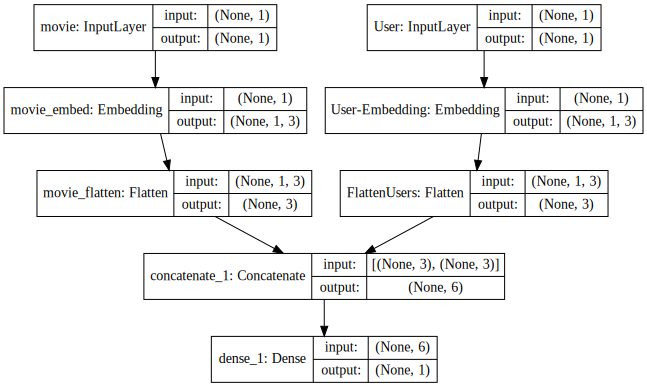

In [18]:
# Possibly implement Tensorboard
SVG(model_to_dot(model, show_shapes = True, show_layer_names = True, rankdir = 'TB').create(prog = 'dot', format = 'svg'))

In [19]:
train.head()

,userId,movieId,rating,timestamp
5234152,35884,6212,3.0,2003-07-05 14:27:08
2994326,20294,4014,4.0,2005-06-16 17:11:40
2710817,18377,1302,4.0,2003-02-23 03:37:03
748552,4988,589,5.0,1999-09-29 09:52:38
3545379,24171,553,4.0,1996-08-05 20:54:32


In [20]:
# print(tra)

In [21]:
print(len(df_combined['userId'].unique())), print(len(df_combined['movieId'].unique()))

138493
26744


(None, None)

In [22]:
fitted = model.fit([train['userId'], train['movieId']], train['rating'], epochs = 10, verbose = 1)

Epoch 1/10
16000210/16000210 [==============================] - 1681s 105us/step - loss: 60.3124 - mean_absolute_error: 0.8291
Epoch 2/10
16000210/16000210 [==============================] - 1614s 101us/step - loss: 36.1451 - mean_absolute_error: 0.8201
Epoch 3/10
16000210/16000210 [==============================] - 1625s 102us/step - loss: 17.7239 - mean_absolute_error: 0.8088
Epoch 4/10
16000210/16000210 [==============================] - 1630s 102us/step - loss: 20.6185 - mean_absolute_error: 0.8238
Epoch 5/10
16000210/16000210 [==============================] - 1628s 102us/step - loss: 19.5553 - mean_absolute_error: 0.8282
Epoch 6/10
16000210/16000210 [==============================] - 1622s 101us/step - loss: 23.5665 - mean_absolute_error: 0.8272
Epoch 7/10
16000210/16000210 [==============================] - 1611s 101us/step - loss: 11.7482 - mean_absolute_error: 0.8374
Epoch 8/10
16000210/16000210 [==============================] - 1591s 99us/step - loss: 13.9606 - mean_absolute

Text(0, 0.5, 'Train Error')

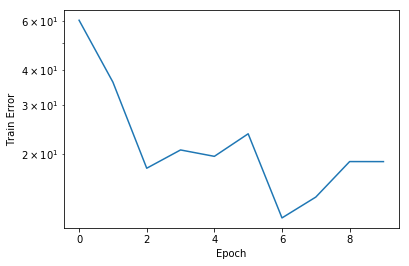

In [26]:
pd.Series(fitted.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [28]:
y_hat = np.round(model.predict([test.userId, test.movieId]),0)
y_true = test.rating

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

0.8442785633090362